#**Project:** Data Exploration and Machine Learning Models for Insurance Premium Prediction

 In the realm of insurance premium prediction, data plays an instrumental role in deriving actionable insights. This project embarks on a journey to harness the potential hidden within a comprehensive dataset to predict insurance charges. The dataset contains diverse attributes such as age, sex, BMI, number of children, smoker status, region, and charges. However, it's important to note that not all these attributes are readily consumable by machine learning models in their current format. We face the challenge of transforming textual features into a numeric representation that machine learning algorithms can effectively learn from.




#**Numeric Conversion and Feature Engineering**

Consider the sex feature. Its text-based categories 'male' and 'female' are converted to numerical equivalents, 0 and 1 respectively. This process of feature engineering is pivotal in making our dataset amenable to predictive modeling.





#**Choice of Models**

In the realm of insurance premium prediction, accuracy is of paramount importance. This project employs a diverse array of regression models to accomplish this objective. Ranging from the well-established Linear Regression, the ensemble power of RandomForest, the intricate Decision Trees, the flexibility of Support Vector Regression (SVR), to the boosting capabilities of XGBoost, this project explores multiple avenues to predict insurance charges with precision.




#**Evaluation Metrics**

Model performance isn't left to intuition. Rigorous evaluation metrics are employed to measure the predictive capabilities of each model. Cross-validation (CV) with an impressive score of 0.848 and R2 scores of 0.884 (train) and 0.879 (test) underline the prowess of the model. The Root Mean Squared Error (RMSE) of 0.348 further cements the effectiveness of the chosen models in this context.




#**Integration and Next Steps**

**The project recognizes that model selection is a nuanced process. To this end, a hack is employed—multiple models are utilized, and their accuracies are compared. The model that performs optimally on the dataset's intricacies is then chosen for further analysis and integration.**

#**Project Scope and Size**

Spanning across 1300 data points, this project holds within it the promise of unearthing patterns that can revolutionize insurance premium predictions. While the journey is still in progress, the early results underline the potential of machine learning to navigate the complex landscape of insurance data.





This project represents not only the practicality of data science but also the exciting promise it holds in transforming industries through data-driven insights.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv("insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset is devoid of any missing values. In case such instances arise, we can employ the following strategies to handle them:

1. **Row Deletion:** Deleting rows with missing values is a suitable approach when the dataset comprises only 1-2% null values or when the dataset's size remains substantial even after removing the affected rows.

2. **Imputation:** Alternatively, null values can be replaced with the mean, median, or mode, depending on their relevance to the dataset's characteristics. Imputation ensures continuity in the dataset while mitigating the impact of missing data.

These strategies safeguard against the influence of missing values, ensuring the dataset's integrity and the reliability of subsequent analyses.



In [ ]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64


The dataset demonstrates a commendable level of organization, with the exception of the "smoker" category. While all other parameters exhibit balance, this dataset poses a regression problem. Hence, retaining the data in its current state suffices. In scenarios where data imbalance is more pronounced, strategic measures such as the Synthetic Minority Over-sampling Technique (SMOTE) or other balancing techniques warrant consideration.

#Converting Categorical Features to Numerical

In [ ]:
Modifier_data = {"sex" : {"male": 0, "female": 1},
                 "region" :{"southeast" : 0, "southwest":1, "northwest":2, "northeast":3},
                 "smoker" :{"yes":1, "no":0}

}
data_copy = data.copy()
data_copy.replace(Modifier_data, inplace= True)

In [ ]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [ ]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Correlation is a statistical concept that measures the degree of relationship between two variables. It indicates how changes in one variable correspond to changes in another variable. Correlation is usually expressed as a value between -1 and 1.

- **Positive Correlation (0 to 1):** When one variable increases, the other tends to increase as well. A value close to 1 indicates a strong positive correlation.

- **Negative Correlation (0 to -1):** When one variable increases, the other tends to decrease. A value close to -1 indicates a strong negative correlation.

- **No Correlation (0):** Changes in one variable do not affect the other variable.

Correlation helps us understand relationships between variables, which is crucial in various fields like finance, science, and data analysis. However, correlation doesn't imply causation—it doesn't prove that changes in one variable cause changes in another, only that they are related in some way.

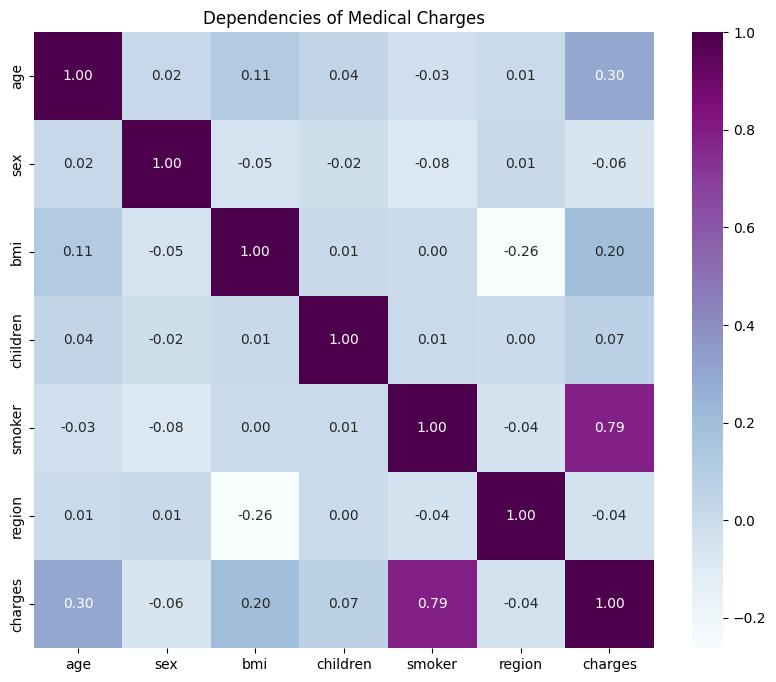

In [ ]:
corr =data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()


In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


#Now we are confirmed that there are no other values in above pre-preocessed column, We can proceed with EDA

<Axes: title={'center': 'Age Vs Chargee'}, xlabel='age', ylabel='charges'>

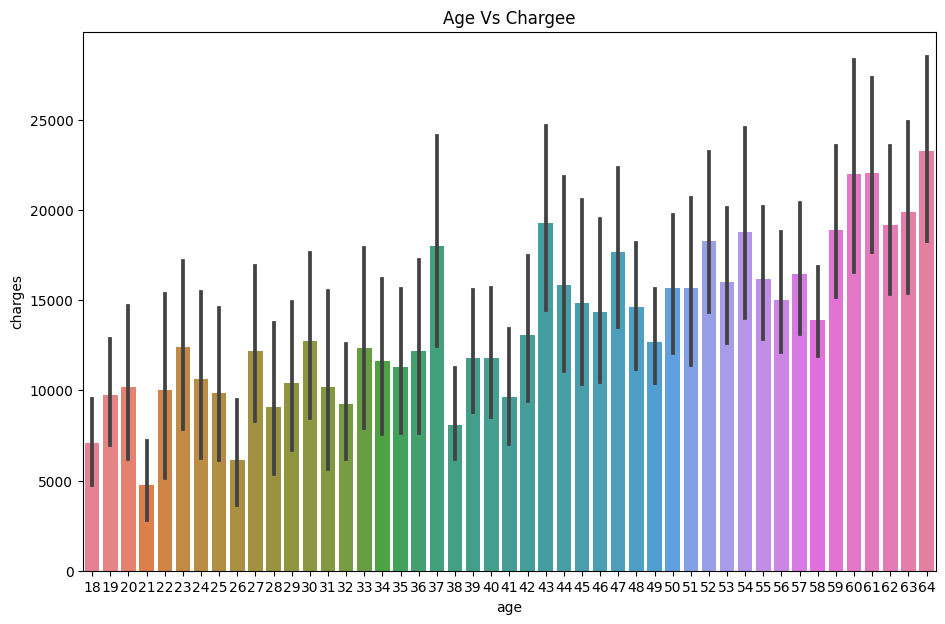

In [ ]:
plt.figure(figsize=(11,7))
plt.title("Age Vs Chargee")
sns.barplot(x = "age", y = "charges",data = data_copy,palette = "husl" )

<Axes: title={'center': 'Smoker Vs Chargee'}, xlabel='smoker', ylabel='charges'>

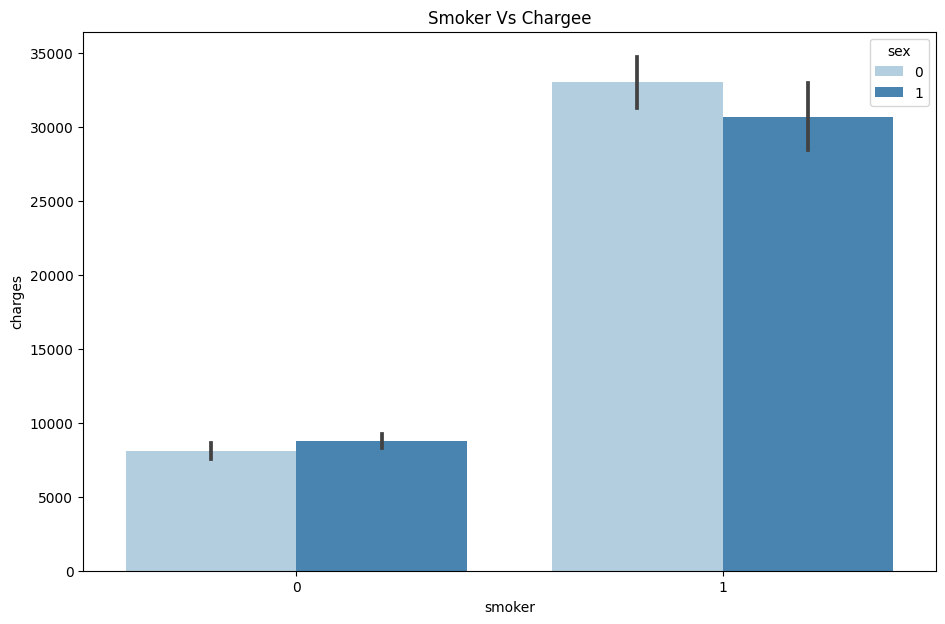

In [ ]:
plt.figure(figsize=(11,7))
plt.title("Smoker Vs Chargee")
sns.barplot(x = "smoker", y = "charges",data = data_copy,palette = "Blues" , hue='sex')

<Axes: title={'center': 'Age Vs Chargee'}, xlabel='bmi', ylabel='charges'>

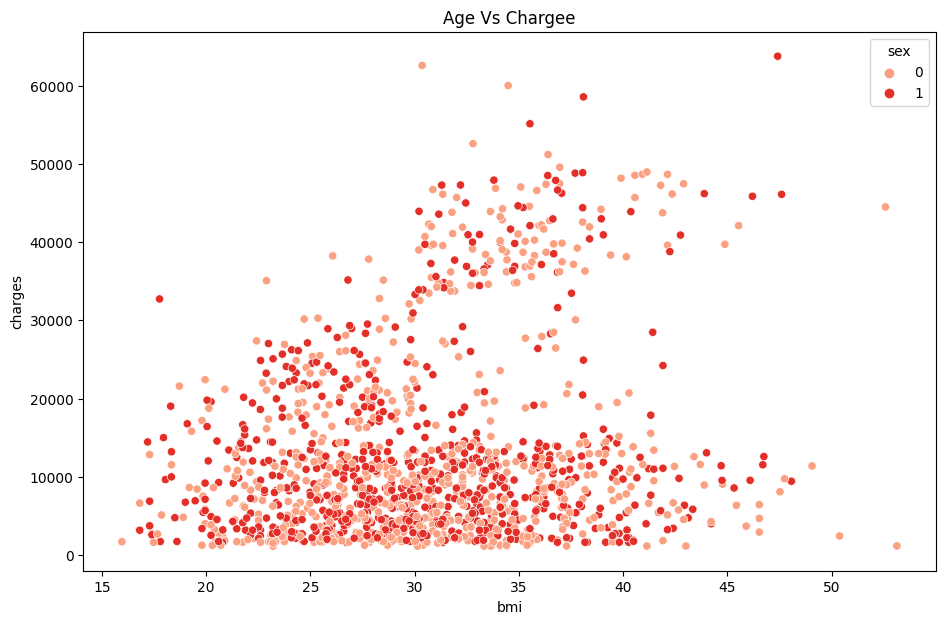

In [ ]:
plt.figure(figsize=(11,7))
plt.title("Age Vs Chargee")
sns.scatterplot(x = "bmi", y = "charges",data = data_copy,palette = "Reds", hue="sex" )

#Plotting Skew and Kurtosis

In [ ]:
print("Printing the Skewnes and Kurtosis for all coloums")
for c in list(data_copy.columns):
  print('{0} : Skewness{1:0.3f} and Kurtosis{2: .3f}'.format(c,data_copy[c].skew(), data_copy[c].kurt()))

Printing the Skewnes and Kurtosis for all coloums
age : Skewness0.056 and Kurtosis-1.245
sex : Skewness0.021 and Kurtosis-2.003
bmi : Skewness0.284 and Kurtosis-0.051
children : Skewness0.938 and Kurtosis 0.202
smoker : Skewness1.465 and Kurtosis 0.146
region : Skewness0.049 and Kurtosis-1.386
charges : Skewness1.516 and Kurtosis 1.606


<ipython-input-39-fac6ebb9a71d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy["age"])


Text(0, 0.5, 'Count')

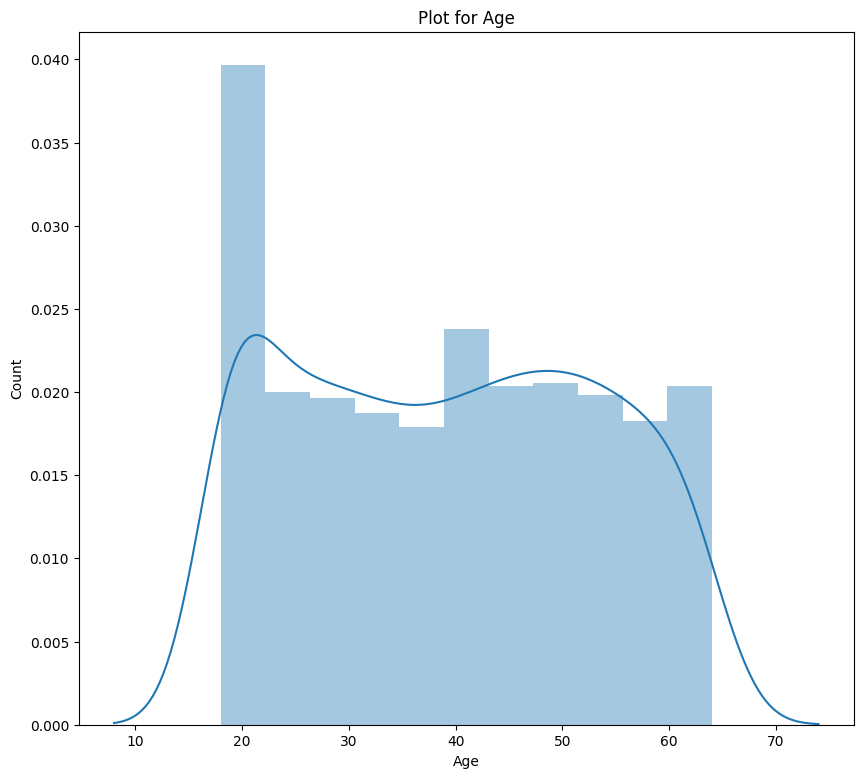

In [ ]:
plt.figure(figsize=(10,9))
sns.distplot(data_copy["age"])
plt.title("Plot for Age")
plt.xlabel("Age")
plt.ylabel("Count")


<ipython-input-40-de7329a58610>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy["bmi"])


Text(0, 0.5, 'Count')

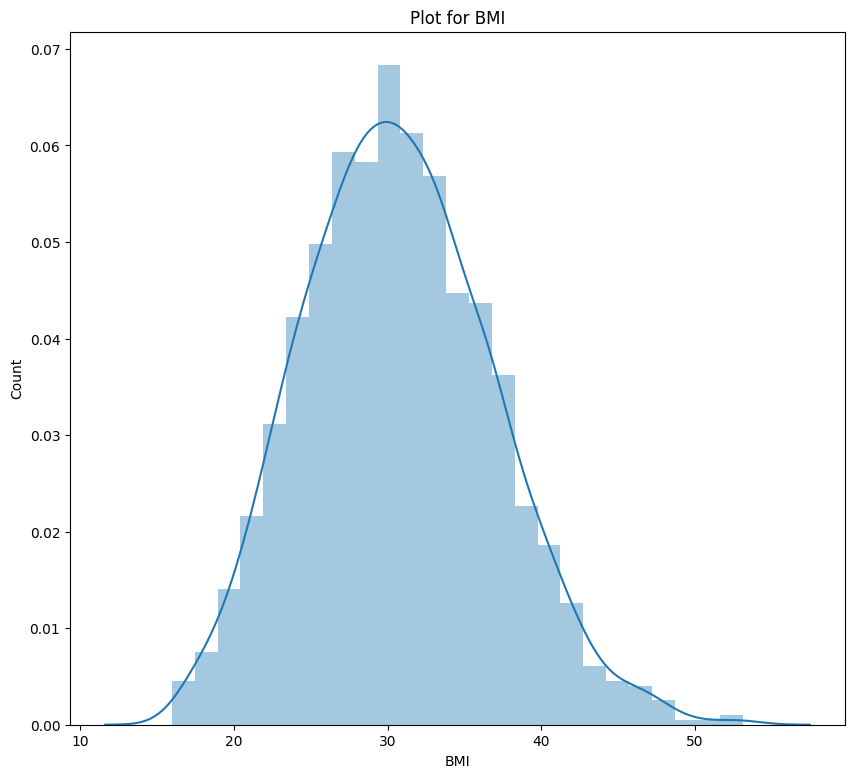

In [ ]:
plt.figure(figsize=(10,9))
sns.distplot(data_copy["bmi"])
plt.title("Plot for BMI")
plt.xlabel("BMI")
plt.ylabel("Count")

<ipython-input-38-b1a2e2ca54b7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy["charges"])


Text(0, 0.5, 'Count')

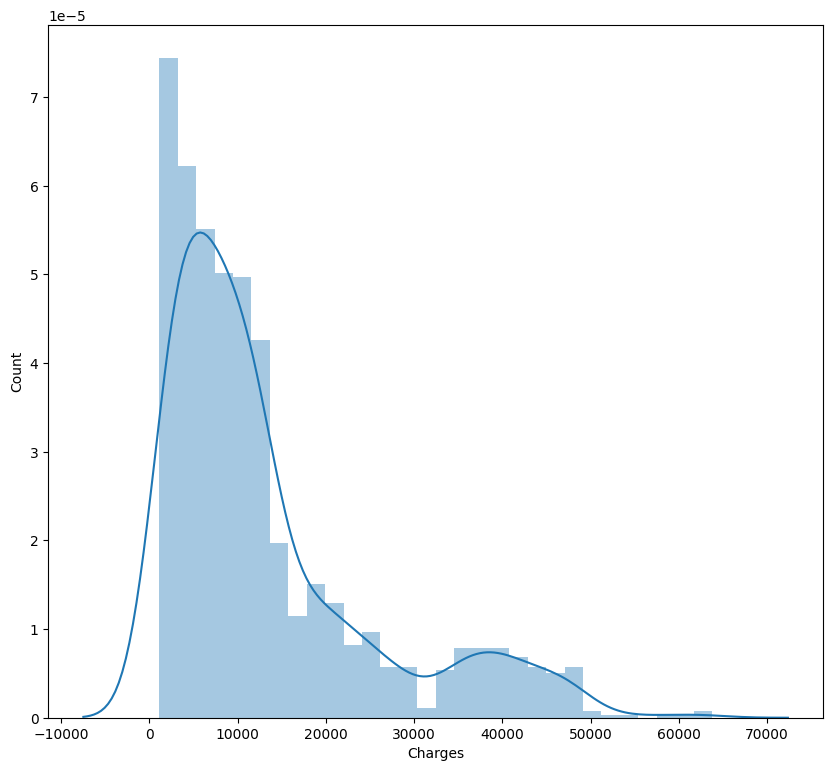

In [ ]:
plt.figure(figsize=(10,9))
sns.distplot(data_copy["charges"])
plt.xlabel("Charges")
plt.ylabel("Count")



#There might be few outliers in Charges but then we cannot say that the value is an outlier as there might be cases in which Charge for medical was very high actually!

#Prepating data - We can scale BMI and Charges Column before proceeding with Prediction

In [ ]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

temp_bmi = data_pre['bmi']
temp_bmi = temp_bmi.values.reshape(-1,1)
data_pre["bmi"] = StandardScaler().fit_transform(temp_bmi)

temp_charge = data_pre['charges']
temp_charge = temp_charge.values.reshape(-1,1)
data_pre["charges"] = StandardScaler().fit_transform(temp_charge)

temp_age = data_pre["age"]
temp_age = temp_age.values.reshape(-1,1)
data_pre["age"] = StandardScaler().fit_transform(temp_age)
data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,1,0.298584
1,-1.509965,0,0.509621,1,0,0,-0.953689
2,-0.797954,0,0.383307,3,0,0,-0.728675
3,-0.441948,0,-1.305531,0,0,2,0.719843
4,-0.513149,0,-0.292556,0,0,2,-0.776802


In [ ]:
x = data_pre.drop("charges", axis=1).values
y = data_pre["charges"].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)
print("size of x_train : ", x_train.shape)
print("size of x_test : ", x_test.shape)
print("size of y_train : ", y_train.shape)
print("size of y_test : ", y_test.shape)

size of x_train :  (1070, 6)
size of x_test :  (268, 6)
size of y_train :  (1070, 1)
size of y_test :  (268, 1)


#importing Libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score,RandomizedSearchCV, GridSearchCV

#linear Regration

In [ ]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

CPU times: user 5.34 ms, sys: 1.1 ms, total: 6.44 ms
Wall time: 27.6 ms


LinearRegression()

In [ ]:
cv_linear_reg_train = cross_val_score(estimator = linear_reg, X=x, y=y,cv=10)
y_pred_linear_reg_train = linear_reg.predict(x_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_train = linear_reg.predict(x_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_train)

rmse_linear = (np.sqrt(mean_squared_error(y_test,y_pred_linear_reg_train)))

print("CV Linear Regration : {0:.3f}".format(cv_linear_reg_train.mean()))
print("R2_score (train):  {0:.3f}".format(r2_score_linear_reg_train))
print("r2_score(test) : {0:.3f}".format(r2_score_linear_reg_test))
print("RMSE : {0:.3f}".format(rmse_linear))

CV Linear Regration : 0.745
R2_score (train):  0.742
r2_score(test) : 0.784
RMSE : 0.478


#Support Vector Machanism (Regression)

In [ ]:
X_c = data_copy.drop("charges", axis = 1).values
y_c = data_copy["charges"].values.reshape(-1,1)

Xtrain_c, Xtest_c, ytrain_c, ytest_c = train_test_split(X_c, y_c, test_size=0.2, random_state= 42)
Xtrain_c_scalled = StandardScaler().fit_transform(Xtrain_c)
Xtest_c_scalled = StandardScaler().fit_transform(Xtest_c)
ytrain_c_scalled = StandardScaler().fit_transform(ytrain_c)
ytest_c_scalled = StandardScaler().fit_transform(ytest_c)
SVM = SVR()

In [ ]:
parameters = {"kernel":["rbf", "sigmoid"],
              "gamma":[0.001,0.01,.1,1,10,100]
              }
svr_greed = GridSearchCV(estimator=SVM, param_grid=parameters, cv=10, verbose=4,n_jobs=-1)
svr_greed.fit(Xtrain_c_scalled,ytrain_c_scalled.ravel())

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=4)

In [ ]:
svr = SVR(C=10,gamma = 0.1, tol = 0.0001)
svr.fit(Xtrain_c_scalled, ytrain_c_scalled.ravel())
print(svr_greed.best_estimator_)
print(svr_greed.best_score_)


SVR(gamma=0.1)
0.8335518527264594


In [ ]:
cv_svr = svr_greed.best_score_
y_pread_svr_train = svr.predict(Xtrain_c_scalled)
r2_score_svm_train = r2_score(ytrain_c_scalled, y_pread_svr_train)

y_pread_svr_test= svr.predict(Xtest_c_scalled)
r2_score_svr_test = r2_score(ytest_c_scalled, y_pread_svr_test)

rmsc_svr = (np.sqrt(mean_squared_error(ytest_c_scalled, y_pread_svr_test)))

print("cv: {0:0.3f}".format(cv_svr.mean()))
print("R2_scoure(train) : {0:0.3f}".format(r2_score_svm_train))
print("re_ score for test: {0:.3f}".format(r2_score_svr_test))
print("RMSE : {0:.3f} ". format(rmsc_svr))

cv: 0.834
R2_scoure(train) : 0.858
re_ score for test: 0.873
RMSE : 0.357 


#Ridge Regressor

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
steps = [("scalar" , StandardScaler()),
         ("poly", PolynomialFeatures(degree=2)),
         ("model", Ridge())
]
ridge_pipeline = Pipeline(steps)

In [ ]:
parameters = {"model__alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,3,5,8,15,35,42,55,100],
              "model__random_state": [42]}
reg_ridge = GridSearchCV(ridge_pipeline, parameters, cv = 10)
reg_ridge = reg_ridge.fit(x_train, y_train.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.24275e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.12123e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.14994e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
reg_ridge.best_estimator_,reg_ridge.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=15, random_state=42))]),
 0.8261754789844702)

In [ ]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(Xtrain_c_scalled, ytrain_c_scalled)
cv_ridge = reg_ridge.best_score_

y_pred_reg_train = ridge.predict(Xtest_c_scalled)
r2_score_ridge_train = r2_score(ytest_c_scalled, y_pred_reg_train)

y_pred_reg_test = ridge.predict(Xtest_c_scalled)
r2_score_ridge_test = r2_score(ytest_c_scalled, y_pread_svr_test)

rmse_ridge = (np.sqrt(mean_squared_error(ytest_c_scalled, y_pred_reg_test)))
